In [ ]:
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

api = BrasileiraoAPI()

try:
    df = api.consultar_dados_mongodb()
    print(f"Total de registros: {df.shape[0]}")
    print("\nVisualizando os 5 primeiros registros:")
    print(df.head())
    
    times = api.obter_todos_times()
    print("\nTimes cadastrados:")
    for time in sorted(times): 
        print(f"- {time}")
        
except Exception as e:
    print(f"Erro ao consultar dados: {str(e)}")

Total de registros: 3800

Visualizando os 5 primeiros registros:
                        _id      id  \
0  67a80ccf5a015b28584e3469  432443   
1  67a80ccf5a015b28584e346a  432446   
2  67a80ccf5a015b28584e346b  432437   
3  67a80ccf5a015b28584e346c  432438   
4  67a80ccf5a015b28584e346d  432441   

                                                area  \
0  {'id': 2032, 'name': 'Brazil', 'code': 'BRA', ...   
1  {'id': 2032, 'name': 'Brazil', 'code': 'BRA', ...   
2  {'id': 2032, 'name': 'Brazil', 'code': 'BRA', ...   
3  {'id': 2032, 'name': 'Brazil', 'code': 'BRA', ...   
4  {'id': 2032, 'name': 'Brazil', 'code': 'BRA', ...   

                                            awayTeam  \
0  {'id': 4289, 'name': 'Cuiabá EC', 'shortName':...   
1  {'id': 1765, 'name': 'Fluminense FC', 'shortNa...   
2  {'id': 6684, 'name': 'SC Internacional', 'shor...   
3  {'id': 4250, 'name': 'Goiás EC', 'shortName': ...   
4  {'id': 1777, 'name': 'EC Bahia', 'shortName': ...   

                          

/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:232: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  todos_times = pd.unique(list(times_home) + list(times_away))


In [35]:
# Recarregar o módulo
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API
api = BrasileiraoAPI()

try:
    # Obter todos os times
    times = api.obter_todos_times()
    
    # Ordenar alfabeticamente e apresentar de forma organizada
    print("\n=== Times do Brasileirão ===\n")
    for i, time in enumerate(sorted(times), 1):
        print(f"{i:2d}. {time}")
    print(f"\nTotal de times: {len(times)}")
    
except Exception as e:
    print(f"Erro ao consultar times: {str(e)}")


=== Times do Brasileirão ===

 1. América FC
 2. Botafogo FR
 3. CA Mineiro
 4. CA Paranaense
 5. CR Flamengo
 6. CR Vasco da Gama
 7. Coritiba FBC
 8. Cruzeiro EC
 9. Cuiabá EC
10. EC Bahia
11. Fluminense FC
12. Fortaleza EC
13. Goiás EC
14. Grêmio FBPA
15. RB Bragantino
16. SC Corinthians Paulista
17. SC Internacional
18. SE Palmeiras
19. Santos FC
20. São Paulo FC

Total de times: 20


In [36]:
# Recarregar o módulo
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API com a chave (necessária para obter novos dados)
api = BrasileiraoAPI(api_key="3c51a5f4b8ad4c40b78cf175636ab6c5")

try:
    # Limpar a coleção
    documentos_removidos = api.limpar_colecao()
    print(f"Removidos {documentos_removidos} documentos da coleção.")
    
    # Obter novos dados
    dados_competicao = api.obter_dados_competicao(competicao_id='BSA', temporada='2023')
    
    # Inserir novos dados
    if dados_competicao:
        api.inserir_dados_mongodb(dados_competicao)
        print("Dados inseridos com sucesso!")
    else:
        print("Não foi possível obter novos dados da API.")
        
except Exception as e:
    print(f"Erro durante a operação: {str(e)}")

Removidos 3800 documentos da coleção.
Inseridos 380 registros na coleção 'brasileirao'.
Dados inseridos com sucesso!


In [37]:
# Recarregar o módulo
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API
api = BrasileiraoAPI()

try:
    # Obter todos os times
    times = api.obter_todos_times()
    
    # Ordenar alfabeticamente e apresentar de forma organizada
    print("\n=== Times do Brasileirão ===\n")
    for i, time in enumerate(sorted(times), 1):
        print(f"{i:2d}. {time}")
    print(f"\nTotal de times: {len(times)}")
    
except Exception as e:
    print(f"Erro ao consultar times: {str(e)}")


=== Times do Brasileirão ===

 1. América FC
 2. Botafogo FR
 3. CA Mineiro
 4. CA Paranaense
 5. CR Flamengo
 6. CR Vasco da Gama
 7. Coritiba FBC
 8. Cruzeiro EC
 9. Cuiabá EC
10. EC Bahia
11. Fluminense FC
12. Fortaleza EC
13. Goiás EC
14. Grêmio FBPA
15. RB Bragantino
16. SC Corinthians Paulista
17. SC Internacional
18. SE Palmeiras
19. Santos FC
20. São Paulo FC

Total de times: 20


In [38]:
# Recarregar o módulo
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API
api = BrasileiraoAPI()

try:
    # Obter vitórias do Fluminense
    vitorias = api.obter_vitorias_time("Fluminense FC")
    
    print("\n=== Vitórias do Fluminense ===\n")
    
    for _, partida in vitorias.iterrows():
        mandante = partida['homeTeam']['name']
        visitante = partida['awayTeam']['name']
        placar_mandante = partida['score']['fullTime']['home']
        placar_visitante = partida['score']['fullTime']['away']
        data = partida['utcDate'].split('T')[0]
        
        print(f"Data: {data}")
        print(f"{mandante} {placar_mandante} x {placar_visitante} {visitante}")
        print("-" * 50)
    
    print(f"\nTotal de vitórias: {len(vitorias)}")
    
except Exception as e:
    print(f"Erro ao consultar vitórias: {str(e)}")


=== Vitórias do Fluminense ===

Data: 2023-04-15
América FC 0 x 3 Fluminense FC
--------------------------------------------------
Data: 2023-04-22
Fluminense FC 2 x 0 CA Paranaense
--------------------------------------------------
Data: 2023-05-11
Cruzeiro EC 0 x 2 Fluminense FC
--------------------------------------------------
Data: 2023-05-13
Fluminense FC 2 x 0 Cuiabá EC
--------------------------------------------------
Data: 2023-06-04
Fluminense FC 2 x 1 RB Bragantino
--------------------------------------------------
Data: 2023-06-24
Fluminense FC 2 x 1 EC Bahia
--------------------------------------------------
Data: 2023-07-09
Fluminense FC 2 x 0 SC Internacional
--------------------------------------------------
Data: 2023-07-29
Fluminense FC 1 x 0 Santos FC
--------------------------------------------------
Data: 2023-08-06
Fluminense FC 2 x 1 SE Palmeiras
--------------------------------------------------
Data: 2023-08-19
Fluminense FC 3 x 1 América FC
-----------------

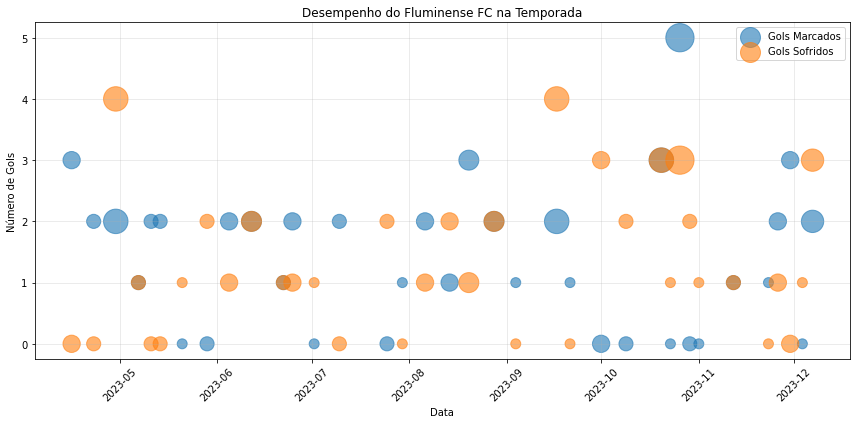

In [39]:
# Recarregar o módulo
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API
api = BrasileiraoAPI()

try:
    # Criar scatter plot do desempenho do Fluminense
    api.plot_desempenho_temporada("Fluminense FC")
    
except Exception as e:
    print(f"Erro ao gerar gráfico: {str(e)}")